In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [13]:
# Load the datasets
data = pd.read_csv('Mall_Customers.csv')
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

NaNs in scaled features: 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


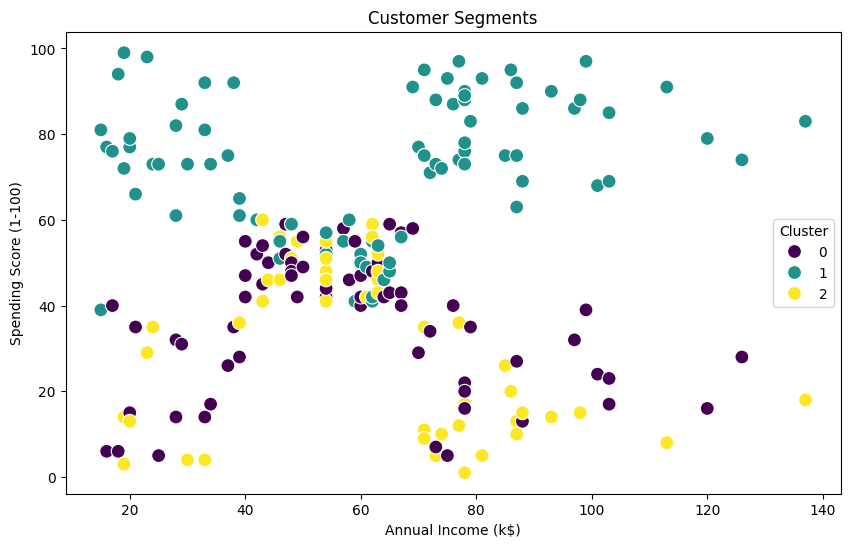

In [14]:
# Load the datasets
data = pd.read_csv('Mall_Customers.csv')
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})



# Handle missing values if any
df.fillna(df.mean(), inplace=True)

# Select features for clustering
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Check for NaNs in the scaled features
print("\nNaNs in scaled features:", np.isnan(features_scaled).sum())

# Implement K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster information to the DataFrame
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()